# Tutorial 2 : Linear regression and trees

## Question 1.

Download and extract the data. Using a notebook load your data through pandas and start exploring the dataset. Get your data from the ”Import in python” button from the download page
* Describe the different variables and find their definition in the documentation
* For each variable make an educated guess on the effect that you expect that variable to have
* Check with a quick statistic if the guess was correct and state if your guess was correct
* Clean the variables removing or imputing NAs

In [853]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

data =pd.concat([X.reset_index(drop=True), y], axis=1)

In [854]:
# variable information 
pd.DataFrame(heart_disease.variables)

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


Important variables : 
* exang
* ca
* oldpeak

In [855]:
data.dropna(inplace=True)

In [856]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Question 2.

Make a few plots to get a better understanding of the data.

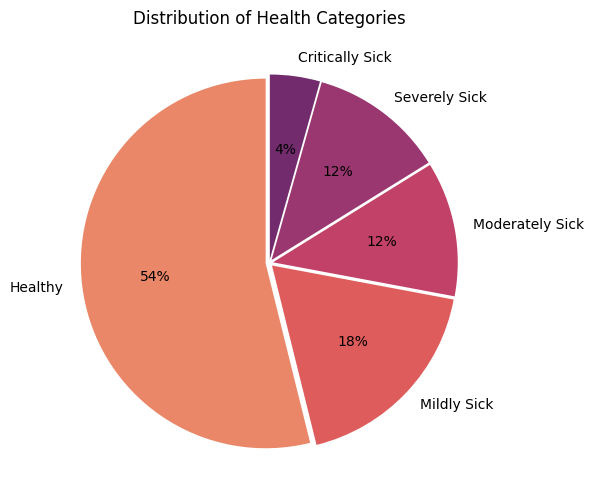

In [857]:
import matplotlib.pyplot as plt
import seaborn as sns
# Sample data
categories = ['Healthy', 'Mildly Sick', 'Moderately Sick', 'Severely Sick', 'Critically Sick']
counts = data['num'].value_counts().sort_index()  # Sorted counts for the categories

# Plotting the pie chart
plt.figure(figsize=(8, 6))

colors = sns.color_palette("flare", len(categories))

plt.pie(counts, labels=categories, autopct='%1.0f%%', startangle=90, colors = colors, explode= [0.02 for _ in range(len(categories))])

# Adding title
plt.title('Distribution of Health Categories')

# Show the plot
plt.show()

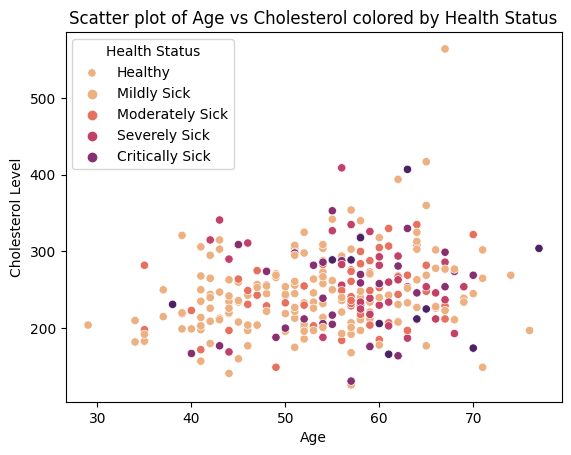

In [858]:
sns.scatterplot(x=data["age"], y=data["chol"], hue=data["num"],palette= "flare")
plt.title('Scatter plot of Age vs Cholesterol colored by Health Status')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend(title="Health Status", labels=['Healthy', 'Mildly Sick', 'Moderately Sick', 'Severely Sick', 'Critically Sick'])
plt.show()

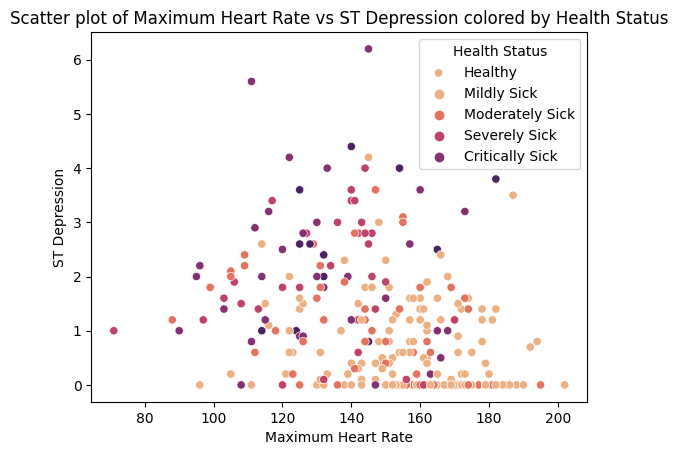

In [859]:
sns.scatterplot(x=data["thalach"], y=data["oldpeak"], hue=data["num"],palette= "flare")
plt.title('Scatter plot of Maximum Heart Rate vs ST Depression colored by Health Status')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('ST Depression')
plt.legend(title="Health Status", labels=['Healthy', 'Mildly Sick', 'Moderately Sick', 'Severely Sick', 'Critically Sick'])
plt.show()

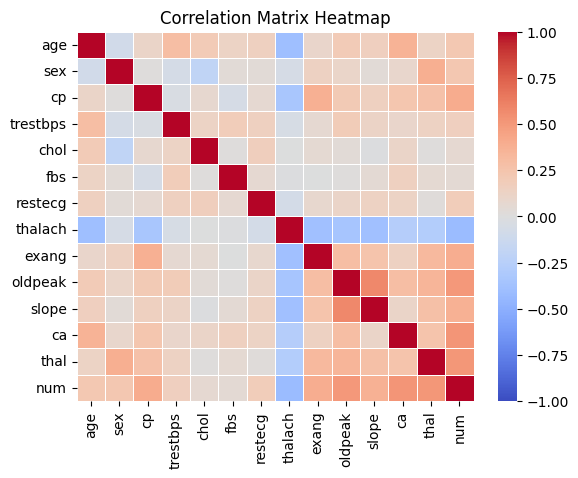

In [860]:
import numpy as np
sns.heatmap(data.corr(),annot=False, cmap='coolwarm',vmin=-1, vmax=1,  linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

## Question 3.

We are going to do a quick logistic regression with two classes, target 0 from one side (healthy) and target 1 to 4 on the other side (sick)
* Do one hot encoding to categorical variables, and select their base.
* With scikit learn, use the logsitic regressor to determine the probability.
* What are the performance of your model? which metrics can you use?
* Use .coef_ and .intercept_ to access the parameters of the model. What can you say about them?
* How the interpretation of these parameters is different from the interpretation of the coeﬀicient of
a linear regression?
* Which are the most important variables? Does it make sense? at the parameter for cholesterol.
How does it compare to the statistic computed on the previous question?

In [861]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Convert from categorical to numeric data
from sklearn.preprocessing import OneHotEncoder


categorical_variables = heart_disease.variables[heart_disease.variables["type"] == "Categorical"].name
# Separate categorical and non-categorical data
categorical_data = data[categorical_variables]
non_categorical_data = data.drop(columns=categorical_variables)

enc = OneHotEncoder(sparse_output=False).fit(data)
encoded_data = enc.fit_transform(categorical_data)
# Convert encoded data to a DataFrame with appropriate column names
encoded_categorical_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(categorical_variables))

# Concatenate the encoded categorical data with the non-categorical data
data = pd.concat([non_categorical_data.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

# Display the first few rows
data.head()

,age,trestbps,chol,thalach,oldpeak,ca,num,sex_0,sex_1,cp_1,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0.0,0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,67,160,286,108,1.5,3.0,2,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,67,120,229,129,2.6,2.0,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,37,130,250,187,3.5,0.0,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,41,130,204,172,1.4,0.0,0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [862]:
target = (data['num'] > 1).astype(int)
del(data['num'])
data.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,67,160,286,108,1.5,3.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,67,120,229,129,2.6,2.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,37,130,250,187,3.5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,41,130,204,172,1.4,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [863]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30)

lrg_clf = LogisticRegression(max_iter=1000)
lrg_clf.fit(X_train, y_train)
y_prob = lrg_clf.predict_proba(X_test)
print(f"Probability of being healthy/sick : {np.mean(y_prob, axis=0)}")

Probability of being healthy/sick : [0.7288034 0.2711966]


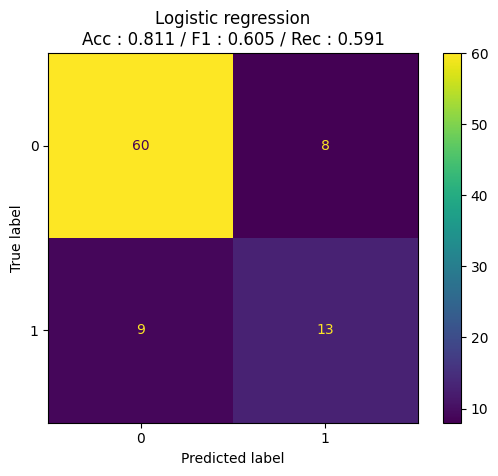

In [864]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lrg_y_pred = lrg_clf.predict(X_test)

lrg_acc=accuracy_score(lrg_y_pred,y_test)
lrg_F1=f1_score(lrg_y_pred,y_test)
lrg_rec=recall_score(lrg_y_pred,y_test)

lrg_cm = confusion_matrix(lrg_y_pred, y_test, labels=lrg_clf.classes_)
lrg_disp = ConfusionMatrixDisplay(confusion_matrix=lrg_cm,display_labels=lrg_clf.classes_)
lrg_disp.plot()
plt.title(f"Logistic regression\nAcc : {round(lrg_acc,3)} / F1 : {round(lrg_F1,3)} / Rec : {round(lrg_rec,3)}")
plt.show()

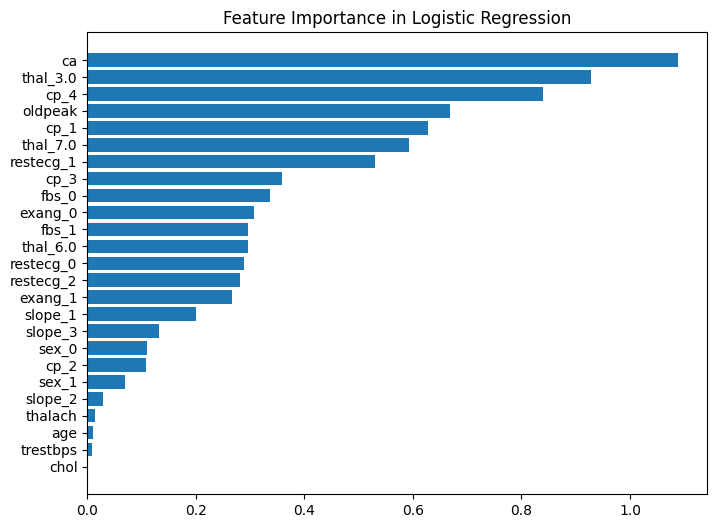

In [865]:
coefficients = lrg_clf.coef_.flatten()  # Flatten if multi-dimensional
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coefficients)  # Use absolute value for importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plotting the feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature Importance in Logistic Regression")
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.show()

## Question 4.

Now lets work on a different model. We will use a decision tree.
Can you describe how a decision tree works?
* Use the scikitlearn library and fit a decision tree to predict the probability of sickness.
* Plot the decision tree. Is there anything surprising?
* Split your data on train and test sets and try to find the best hyper-parameters to fit the model. Is the tree different?
* Which model yields better results, the linear regression or the decision tree?
* Explain how the decision tree weights are computed

Probability of being healthy/sick : [0.72053872 0.27946128]


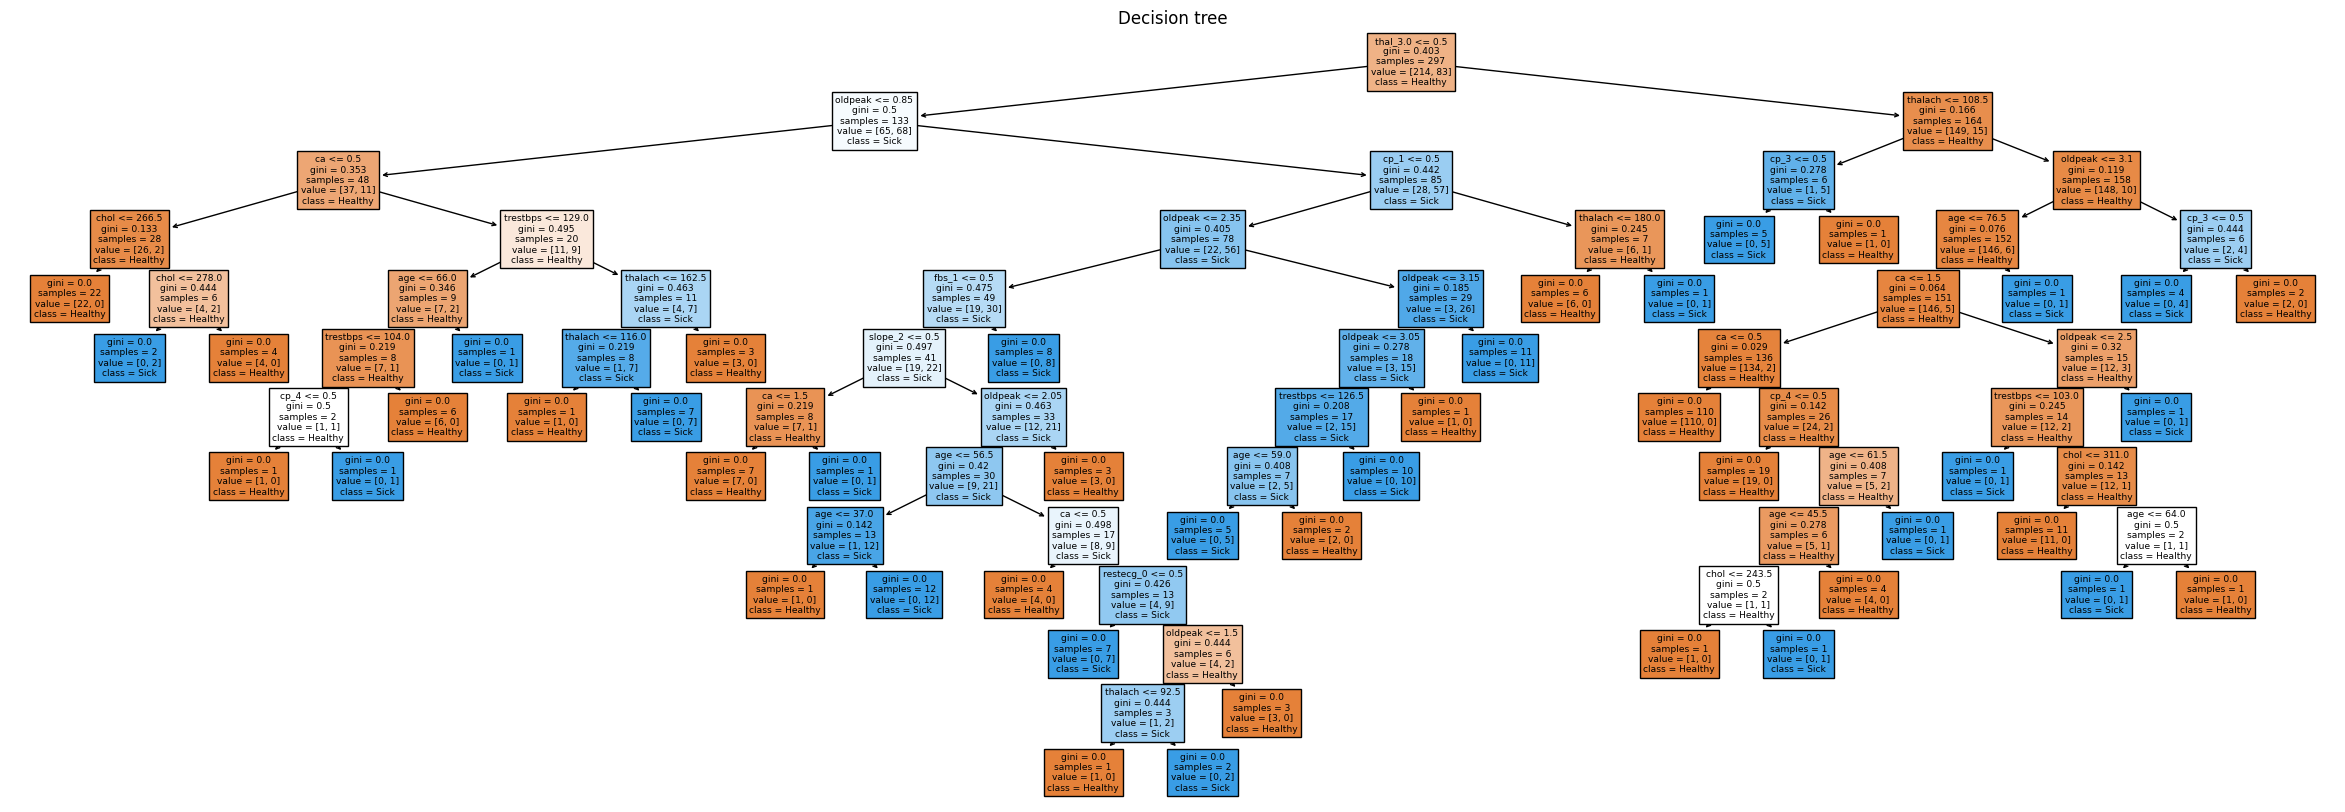

In [866]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


# Fit a decision tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(data, target)


# Predict the probability of sickness
y_prob = dt_clf.predict_proba(data)
print(f"Probability of being healthy/sick : {np.mean(y_prob, axis=0)}")

plt.figure(figsize=(30, 10), dpi=100)  # Adjust size and DPI as needed
tree.plot_tree(dt_clf, feature_names=X_train.columns, class_names=['Healthy', 'Sick'], filled=True)
plt.title("Decision tree")
plt.show()

Best Parameters: {'max_depth': 6, 'min_samples_split': 20}


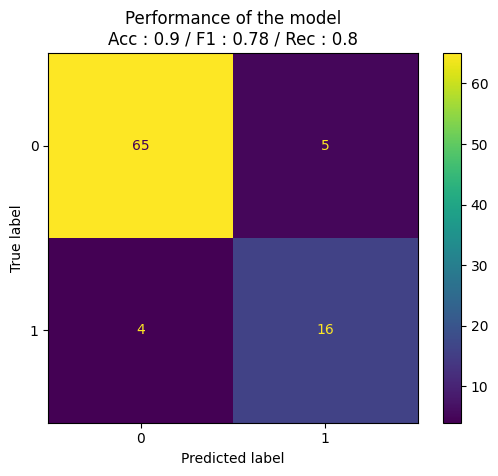

In [867]:
dt_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 6, 7, 10],
    'min_samples_split': [10, 15, 20],
}

# GridSearch to find the best parameters
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the model with GridSearch
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_dt_clf = grid_search.best_estimator_

best_dt_clf.fit(X_test, y_test)

# Test the performance with the tuned hyperparameters
y_pred_tuned = best_dt_clf.predict(X_test)


dt_y_pred = best_dt_clf.predict(X_test)


dt_acc=accuracy_score(dt_y_pred,y_test)
dt_F1=f1_score(dt_y_pred,y_test)
dt_rec=recall_score(dt_y_pred,y_test)

dt_cm = confusion_matrix(dt_y_pred, y_test, labels=best_dt_clf.classes_)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,display_labels=best_dt_clf.classes_)
dt_disp.plot()
plt.title(f"Performance of the model\nAcc : {round(dt_acc,3)} / F1 : {round(dt_F1,3)} / Rec : {round(dt_rec,3)}")
plt.show()

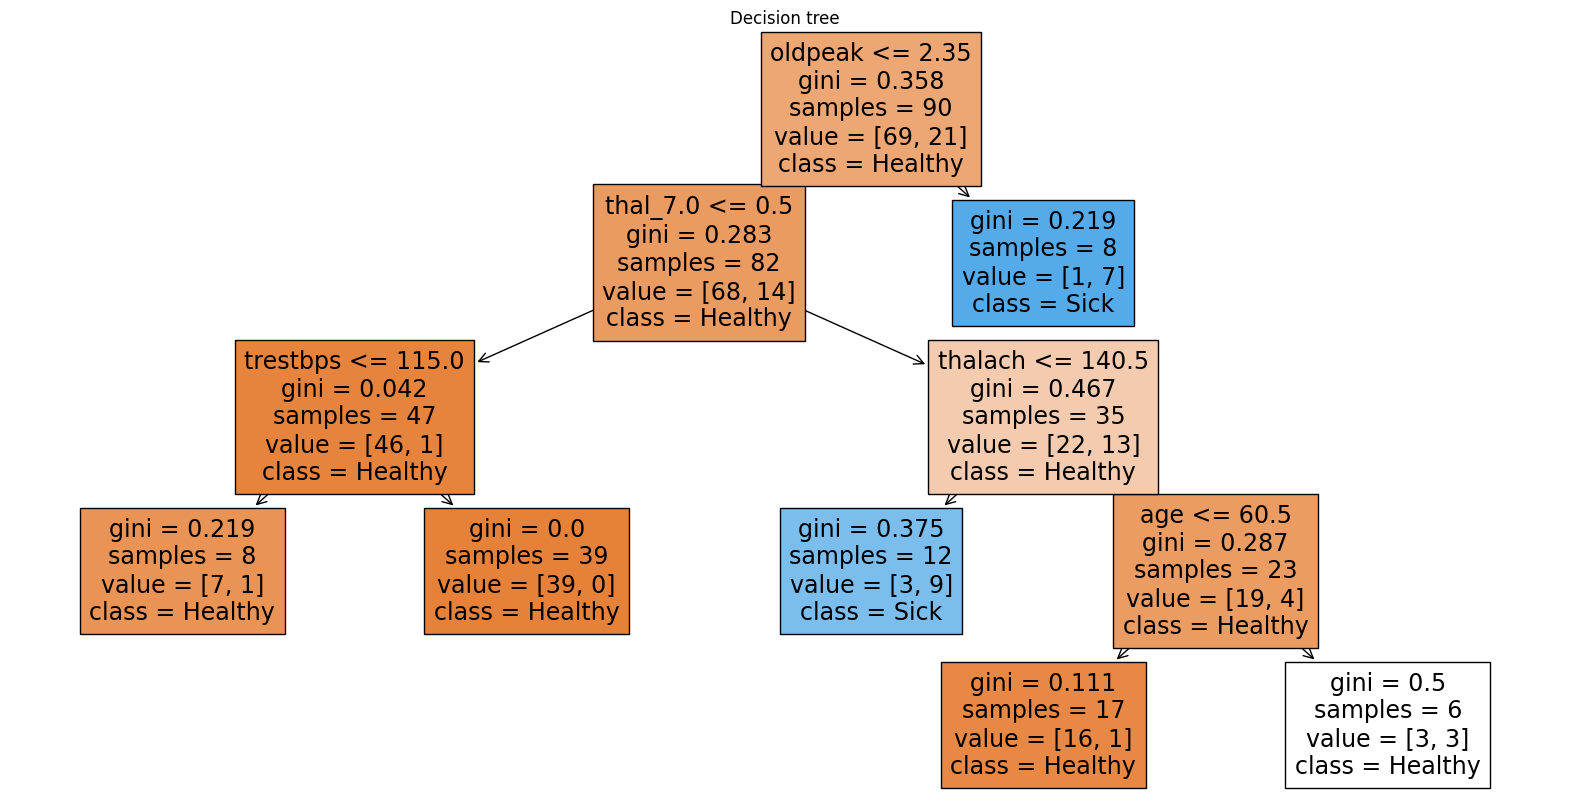

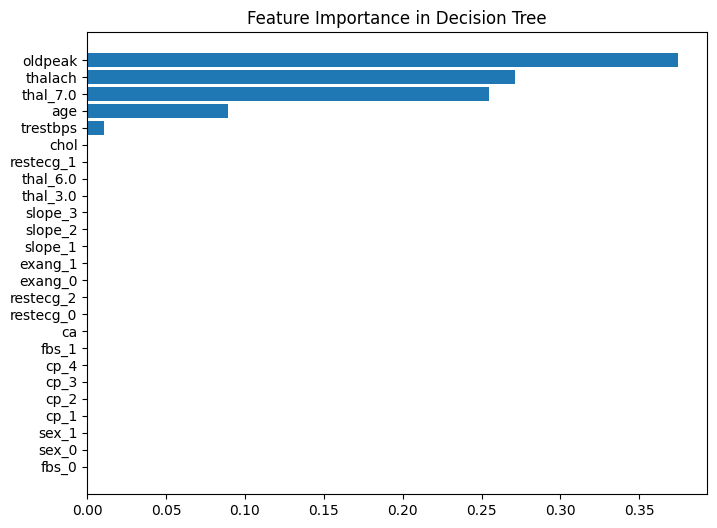

In [868]:
plt.figure(figsize=(20, 10), dpi=100) 
tree.plot_tree(best_dt_clf, feature_names=X_train.columns, class_names=['Healthy', 'Sick'], filled=True)
plt.title("Decision tree")
plt.show()
importances = best_dt_clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': best_dt_clf.feature_names_in_,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature Importance in Decision Tree")
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.show()


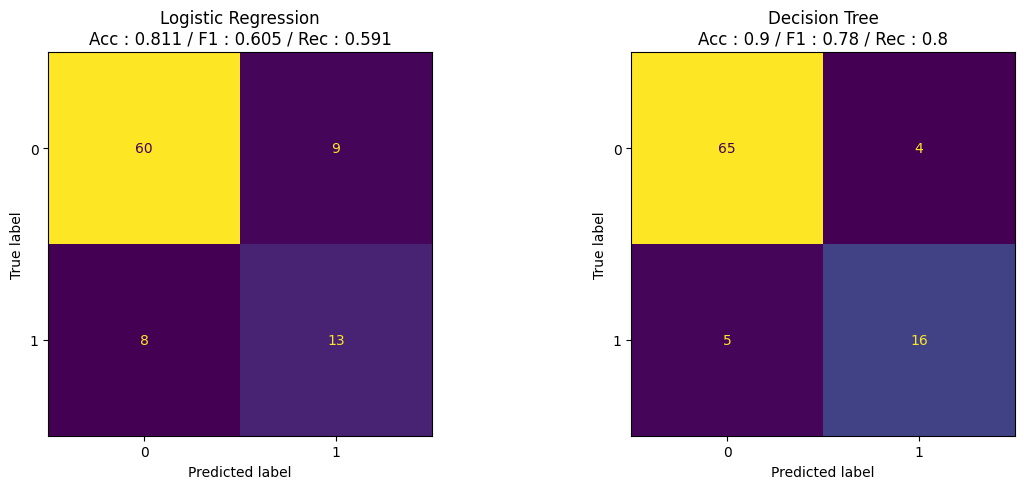

In [869]:
# Set up the side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figure size as needed

# Logistic Regression Confusion Matrix
lrg_cm = confusion_matrix(y_test, lrg_y_pred, labels=lrg_clf.classes_)
lrg_disp = ConfusionMatrixDisplay(confusion_matrix=lrg_cm, display_labels=lrg_clf.classes_)
lrg_disp.plot(ax=axes[0], colorbar=False)
axes[0].set_title(f"Logistic Regression\nAcc : {round(lrg_acc, 3)} / F1 : {round(lrg_F1, 3)} / Rec : {round(lrg_rec, 3)}")

# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_y_pred, labels=best_dt_clf.classes_)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=best_dt_clf.classes_)
dt_disp.plot(ax=axes[1], colorbar=False)
axes[1].set_title(f"Decision Tree\nAcc : {round(dt_acc, 3)} / F1 : {round(dt_F1, 3)} / Rec : {round(dt_rec, 3)}")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Question 5.

We are going to use a random forest algorithm now.
* Use the scikitlearn library and fit a random forest on a training set.
* Which model yields better results? ( don’t forget to tune the hyperparameters)
* Look at the variable weights. Which variables are more important? How can you interpret that?


In [870]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_clf = RandomForestClassifier()
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': [7, 8, 9, 10],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# GridSearch to find the best parameters
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the model with GridSearch
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Test the performance with the tuned hyperparameters
y_pred_tuned = best_rf.predict(X_test)

rf_acc = accuracy_score(y_pred_tuned,y_test)
rf_F1 = f1_score(y_pred_tuned,y_test)
rf_rec=recall_score(y_pred_tuned,y_test)


Best Parameters: {'bootstrap': True, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


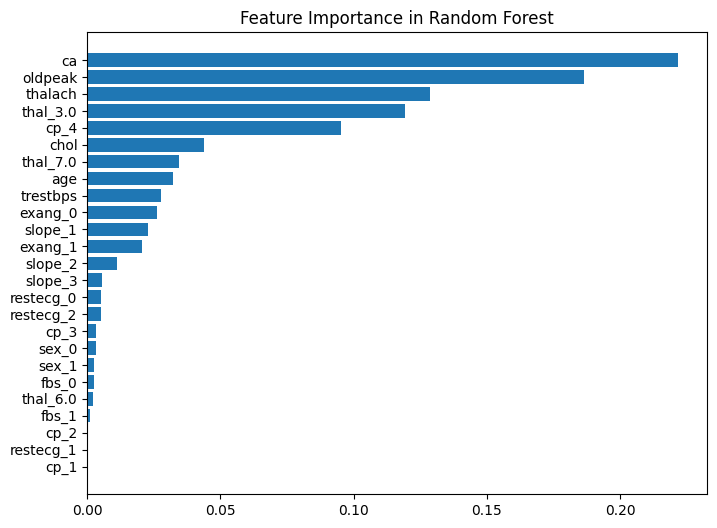

In [871]:

importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature Importance in Random Forest")
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.show()


## Comparison of the models.

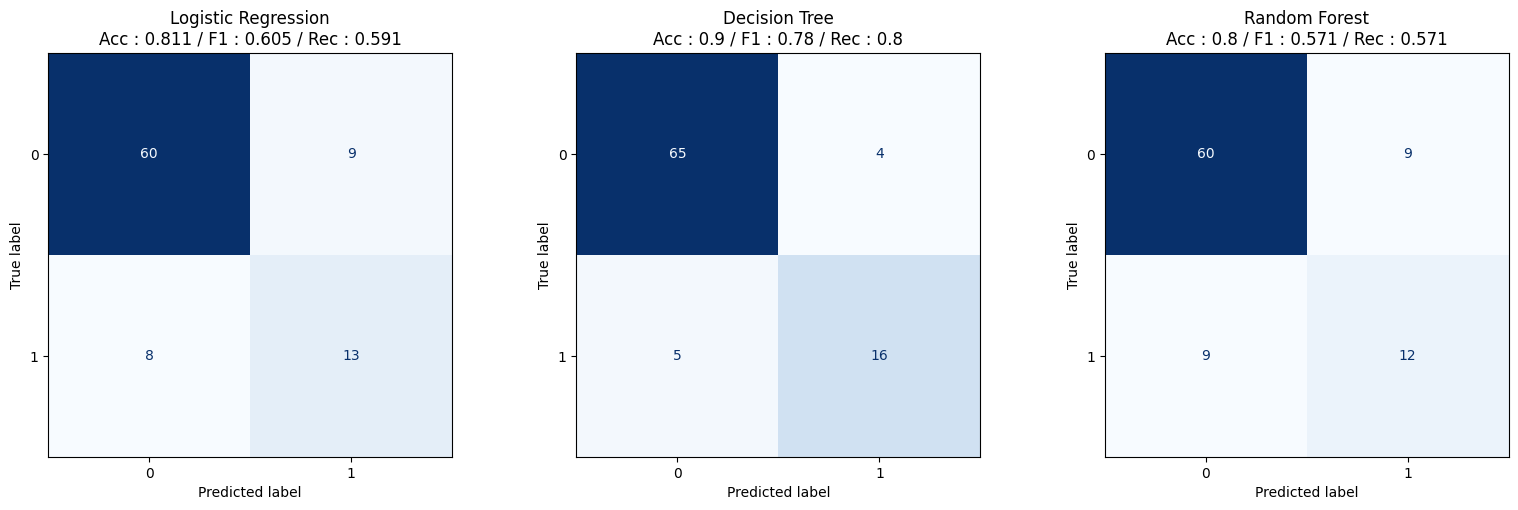

In [872]:

# Set up the side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # Adjust figure size as needed

# Logistic Regression Confusion Matrix
lrg_cm = confusion_matrix(y_test, lrg_y_pred, labels=lrg_clf.classes_)
lrg_disp = ConfusionMatrixDisplay(confusion_matrix=lrg_cm, display_labels=lrg_clf.classes_)
lrg_disp.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title(f"Logistic Regression\nAcc : {round(lrg_acc, 3)} / F1 : {round(lrg_F1, 3)} / Rec : {round(lrg_rec, 3)}")

# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_y_pred, labels=best_dt_clf.classes_)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=best_dt_clf.classes_)
dt_disp.plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title(f"Decision Tree\nAcc : {round(dt_acc, 3)} / F1 : {round(dt_F1, 3)} / Rec : {round(dt_rec, 3)}")


rf_cm = confusion_matrix(y_pred_tuned, y_test, labels=best_rf.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,display_labels=best_rf.classes_)
rf_disp.plot(ax=axes[2], cmap='Blues', colorbar=False)
axes[2].set_title(f"Random Forest\nAcc : {round(rf_acc,3)} / F1 : {round(rf_F1,3)} / Rec : {round(rf_rec,3)}")
# Adjust layout and show plot
plt.tight_layout()
plt.show()